## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [1]:
path_to_zips = '../data/Challenge/'
searches_file = path_to_zips + 'searches.csv.bz2'

import pandas as pd

sample = pd.read_csv(searches_file, nrows=100000, sep='^')

In [2]:
pd.options.display.max_columns = None

sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


## Select the columns of interest

In [3]:
sample = sample[['Date', 'Destination']]
sample

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD
5,2013-01-01,BLR
6,2013-01-01,PAR
7,2013-01-01,DUB
8,2013-01-01,ACE
9,2013-01-01,BGW


## Make processing plan


* Filter Mad, Bcn, Agp
* Create YYYY-MM column
* Group by [destination, YYYY-MM]
* Sum
* Plot the results



### filter out the the searches for MAD, BCN, AGP

Take only the rows having MAD, BCN or AGP as destination

In [4]:
target_destinations = ['MAD', 'BCN', 'AGP']
searches_of_interest = sample[sample['Destination'].isin(target_destinations)]
searches_of_interest.shape

(3663, 2)

In [5]:
sample[sample['Destination'] == 'MAD' or sample['Destination'] == 'BCN']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

We need to get the month from the Date column

We cannot use a datetime function on 'date' column as it is string

Options:

* Using string and obtaining yyyy-mm directly from it

* Transforming string to date:      

  * parse_dates=['Date'] - in read_csv function

  * pd.to_datetime  - function

### Option 1) use directly pd.to_datetime()

In [6]:
pd.to_datetime(searches_of_interest['Date'])

4       2013-01-01
93      2013-01-01
113     2013-01-01
147     2013-01-01
151     2013-01-01
165     2013-01-01
177     2013-01-01
186     2013-01-01
188     2013-01-01
208     2013-01-01
229     2013-01-01
242     2013-01-01
253     2013-01-01
322     2013-01-01
365     2013-01-01
375     2013-01-01
406     2013-01-01
458     2013-01-01
481     2013-01-01
500     2013-01-01
509     2013-01-01
541     2013-01-01
593     2013-01-01
606     2013-01-01
618     2013-01-01
623     2013-01-01
628     2013-01-01
633     2013-01-01
641     2013-01-01
674     2013-01-01
           ...    
99271   2013-04-10
99292   2013-04-10
99324   2013-04-10
99348   2013-04-10
99353   2013-04-10
99373   2013-04-10
99381   2013-04-10
99397   2013-04-10
99400   2013-04-10
99485   2013-04-10
99511   2013-04-10
99538   2013-04-10
99560   2013-04-10
99615   2013-04-10
99633   2013-04-10
99656   2013-04-10
99668   2013-04-10
99690   2013-04-10
99711   2013-04-10
99713   2013-04-10
99716   2013-04-10
99718   2013

### Option 2) get PlotDate directly from the string

In [7]:
searches_of_interest['DepMonth'] = searches_of_interest['Date'].str[:7]

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
searches_of_interest.head()

,Date,Destination,DepMonth
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


## group by arr_port search month

In [9]:
searches_per_month = searches_of_interest.groupby(['Destination', 'DepMonth']).count()

searches_per_month.columns = ['Searches']
searches_per_month.head()

Searches
Destination DepMonth          
AGP         2013-01        169
            2013-02        147
            2013-03        187
            2013-04         31
BCN         2013-01        517

In [10]:
help(searches_of_interest.pivot)

Help on method pivot in module pandas.core.frame:

pivot(index=None, columns=None, values=None) method of pandas.core.frame.DataFrame instance
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from index / columns to form axes of the resulting
    DataFrame.
    
    Parameters
    ----------
    index : string or object, optional
        Column name to use to make new frame's index. If None, uses
        existing index.
    columns : string or object
        Column name to use to make new frame's columns
    values : string or object, optional
        Column name to use for populating new frame's values. If not
        specified, all remaining columns will be used and the result will
        have hierarchically indexed columns
    
    Returns
    -------
    pivoted : DataFrame
    
    See also
    --------
    DataFrame.pivot_table : generalization of pivot that can handle
        duplicate values for one index/column pair
    DataFrame.unsta

We need to reset the index because pivot requires a flat DataFrame

In [11]:
searches_per_month.reset_index()

,Destination,DepMonth,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


Now we are ready to reorganize the DataFrame into the shape we need for plotting.

In [12]:
data_to_plot = searches_per_month.reset_index().pivot('DepMonth', 'Destination', 'Searches')

In [13]:
data_to_plot

Destination,AGP,BCN,MAD
DepMonth,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


## 4.3 Plotting

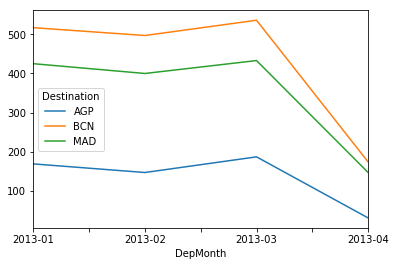

In [14]:
%matplotlib inline

data_to_plot.plot()

## 5) Adjust the code to work with Big data

In [15]:
searches = pd.read_csv(searches_file, sep='^', nrows=100000, chunksize=10000)
partial_results = []

for chunk in searches:
    
    target_destinations = ['MAD', 'BCN', 'AGP']
    searches_of_interest = chunk[chunk['Destination'].isin(target_destinations)]
    searches_of_interest['DepMonth'] = searches_of_interest['Date'].str[:7]
    searches_per_month = searches_of_interest.groupby(['Destination', 'DepMonth'])['Date'].count()

    partial_results.append(searches_per_month)
    
all_results = pd.concat(partial_results)
aggregated = all_results.groupby(['Destination', 'DepMonth']).sum()

data_to_plot = aggregated.reset_index().pivot('DepMonth', 'Destination', 'Date')
data_to_plot

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Destination,AGP,BCN,MAD
DepMonth,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


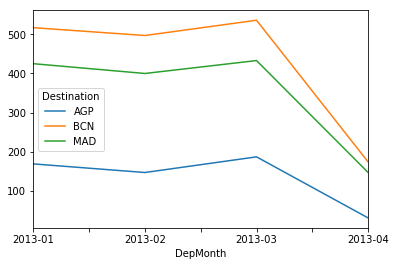

In [16]:
data_to_plot.plot()

In [17]:
from datetime import datetime

searches = pd.read_csv(searches_file, sep='^', chunksize=2e6)
partial_results = []

for chunk_num, chunk in enumerate(searches):
    print('Start processing chunk %d at %s' % (chunk_num, datetime.now()))

    target_destinations = ['MAD', 'BCN', 'AGP']
    searches_of_interest = chunk[chunk['Destination'].isin(target_destinations)]
    searches_of_interest['DepMonth'] = searches_of_interest['Date'].str[:7]
    searches_per_month = searches_of_interest.groupby(['Destination', 'DepMonth'])['Date'].count()

    partial_results.append(searches_per_month)
    
all_results = pd.concat(partial_results)
aggregated = all_results.groupby(['Destination', 'DepMonth']).sum()

data_to_plot = aggregated.reset_index().pivot('DepMonth', 'Destination', 'Date')
data_to_plot

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Start processing chunk 0 at 2018-06-05 10:22:06.243324


/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Start processing chunk 1 at 2018-06-05 10:22:32.644011
Start processing chunk 2 at 2018-06-05 10:23:04.264956
Start processing chunk 3 at 2018-06-05 10:23:26.479058
Start processing chunk 4 at 2018-06-05 10:23:48.722587
Start processing chunk 5 at 2018-06-05 10:24:10.900181
Start processing chunk 6 at 2018-06-05 10:24:35.462995
Start processing chunk 7 at 2018-06-05 10:24:58.996580
Start processing chunk 8 at 2018-06-05 10:25:19.752404
Start processing chunk 9 at 2018-06-05 10:25:43.868494


/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Start processing chunk 10 at 2018-06-05 10:25:48.746571


Destination,AGP,BCN,MAD
DepMonth,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334
2013-06,7923,26505,22800
2013-07,8892,29241,22971
2013-08,7866,27075,21831
2013-09,8151,23427,21147


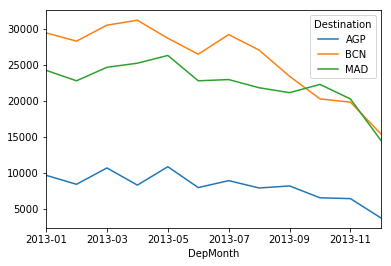

In [19]:
data_to_plot.plot()